In [1]:
import os
import mglearn
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
adult_path = os.path.join(mglearn.datasets.DATA_PATH, "adult.data")
data = pd.read_csv(
    adult_path, header=None, index_col=False,
    names=['age', 'workclass', 'fnlwgt', 'education',  'education-num',
           'marital-status', 'occupation', 'relationship', 'race', 'gender',
           'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
           'income'])

data = data[['age', 'workclass', 'education', 'gender', 'hours-per-week',
             'occupation', 'income']]

display(data.head())

,age,workclass,education,gender,hours-per-week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K


In [2]:
print("Original features:\n",list(data.columns),"\n")
data_dummies=pd.get_dummies(data)
print("Feature after get dummies:\n",list(data_dummies.columns))

Original features:
 ['age', 'workclass', 'education', 'gender', 'hours-per-week', 'occupation', 'income'] 

Feature after get dummies:
 ['age', 'hours-per-week', 'workclass_ ?', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Never-worked', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_ 10th', 'education_ 11th', 'education_ 12th', 'education_ 1st-4th', 'education_ 5th-6th', 'education_ 7th-8th', 'education_ 9th', 'education_ Assoc-acdm', 'education_ Assoc-voc', 'education_ Bachelors', 'education_ Doctorate', 'education_ HS-grad', 'education_ Masters', 'education_ Preschool', 'education_ Prof-school', 'education_ Some-college', 'gender_ Female', 'gender_ Male', 'occupation_ ?', 'occupation_ Adm-clerical', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'occupation_ Machine-op-in

In [3]:
features=data_dummies.loc[:,'age':'occupation_ Transport-moving']
X=features.values
y=data_dummies['income_ >50K'].values

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)
logreg=LogisticRegression(max_iter=100000)
logreg.fit(X_train,y_train)
print("Test score:{:.2f}".format(logreg.score(X_test,y_test)))

Test score:0.81


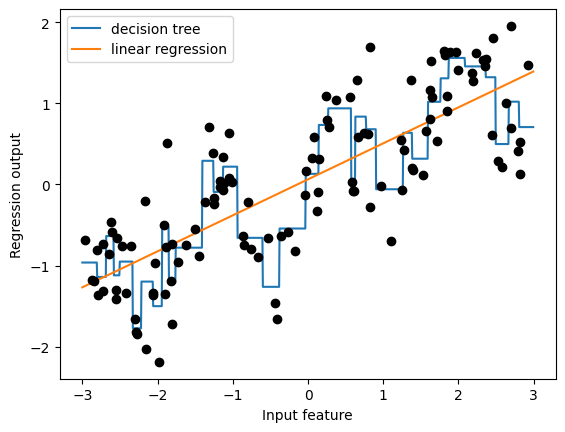

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

X,y=mglearn.datasets.make_wave(n_samples=120)
line=np.linspace(-3,3,1000,endpoint=False).reshape(-1,1)
reg=DecisionTreeRegressor(min_samples_leaf=3).fit(X,y)
plt.plot(line,reg.predict(line),label="decision tree")

reg=LinearRegression().fit(X,y)
plt.plot(line,reg.predict(line),label="linear regression")

plt.plot(X[:,0],y,'o',c='k')
plt.xlabel("Input feature")
plt.ylabel("Regression output")
plt.legend(loc="best")

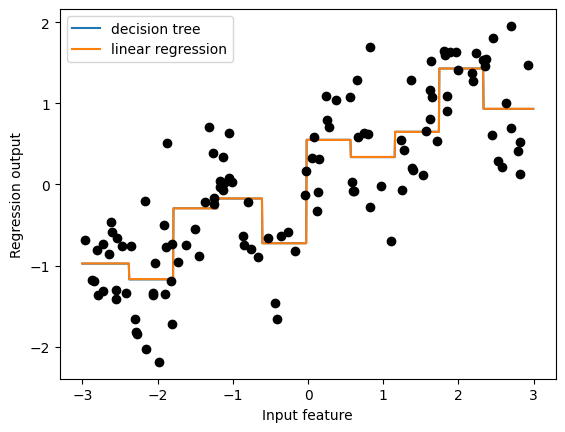

In [5]:
from sklearn.preprocessing import KBinsDiscretizer

kb=KBinsDiscretizer(n_bins=10,strategy='uniform',encode='onehot-dense',subsample=None)
X_binned=kb.fit_transform(X)
line_bined=kb.fit(X).transform(line)

reg=DecisionTreeRegressor(min_samples_leaf=3).fit(X_binned,y)
plt.plot(line,reg.predict(line_bined),label="decision tree")

reg=LinearRegression().fit(X_binned,y)
plt.plot(line,reg.predict(line_bined),label="linear regression")

plt.plot(X[:,0],y,'o',c='k')
plt.xlabel("Input feature")
plt.ylabel("Regression output")
plt.legend(loc="best")

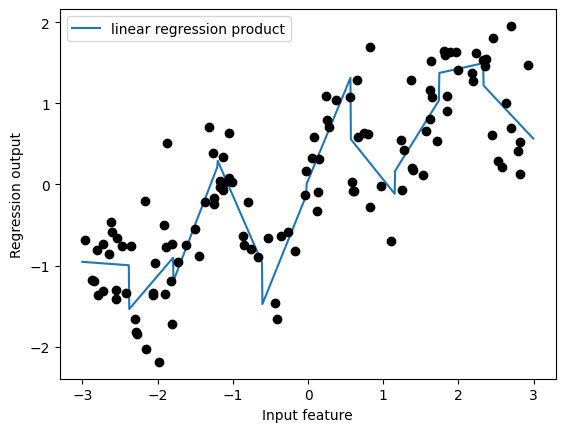

In [6]:
X_product=np.hstack([X_binned,X*X_binned])
line_product=np.hstack([line_bined,line*line_bined])
reg=LinearRegression().fit(X_product,y)
plt.plot(line,reg.predict(line_product),label="linear regression product")

plt.plot(X[:,0],y,'o',c='k')
plt.xlabel("Input feature")
plt.ylabel("Regression output")
plt.legend(loc="best")

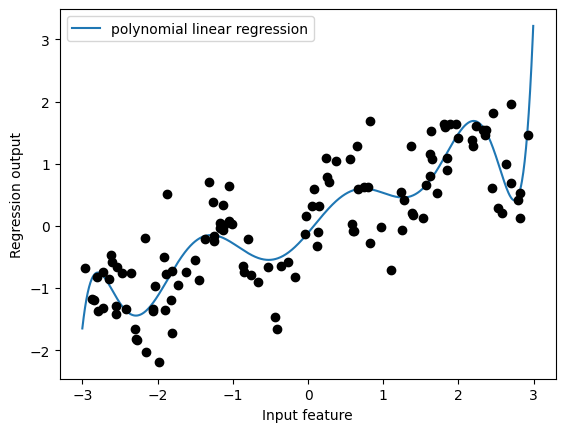

In [7]:
from sklearn.preprocessing import PolynomialFeatures

poly=PolynomialFeatures(degree=10,include_bias=False)
X_poly=poly.fit_transform(X)

reg=LinearRegression().fit(X_poly,y)
line_poly=poly.transform(line)
plt.plot(line,reg.predict(line_poly),label="polynomial linear regression")

plt.plot(X[:,0],y,'o',c='k')
plt.xlabel("Input feature")
plt.ylabel("Regression output")
plt.legend(loc="best")

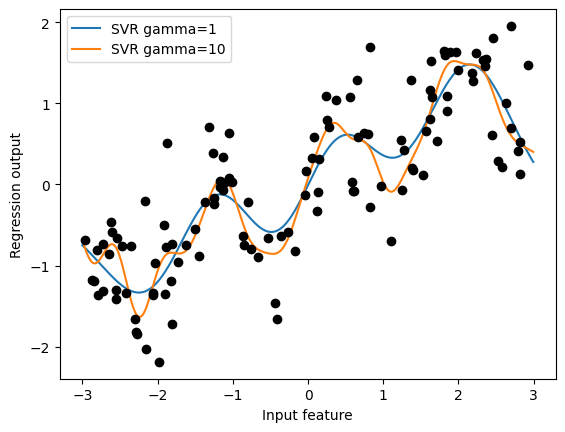

In [8]:
from sklearn.svm import SVR

svr=SVR(gamma=1).fit(X,y)
plt.plot(line,svr.predict(line),label='SVR gamma=1')
svr=SVR(gamma=10).fit(X,y)
plt.plot(line,svr.predict(line),label='SVR gamma=10')

plt.plot(X[:,0],y,'o',c='k')
plt.xlabel("Input feature")
plt.ylabel("Regression output")
plt.legend(loc="best")

In [9]:
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import MinMaxScaler

california=fetch_california_housing()
X_train,X_test,y_train,y_test=train_test_split(california.data,california.target,random_state=0)

scaler=MinMaxScaler()
X_train_scale=scaler.fit_transform(X_train)
X_test_scale=scaler.fit_transform(X_test)

poly=PolynomialFeatures(degree=2).fit(X_train_scale)
X_train_poly=poly.transform(X_train_scale)
X_test_poly=poly.transform(X_test_scale)

In [10]:
from sklearn.linear_model import Ridge
ridge=Ridge(alpha=0.7).fit(X_train_scale,y_train)
print("Score without interaction: {:.3f}".format(ridge.score(X_test_scale,y_test)))
ridge=Ridge(alpha=0.7).fit(X_train_poly,y_train)
print("Score with interaction: {:.3f}".format(ridge.score(X_test_poly,y_test)))

Score without interaction: 0.570
Score with interaction: 0.596


([], [])

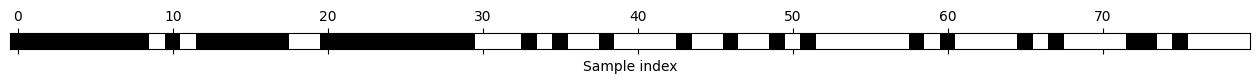

In [11]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectPercentile

cancer=load_breast_cancer()

rng=np.random.RandomState(42)
noise=rng.normal(size=(len(cancer.data),50))
X_w_noise=np.hstack([cancer.data,noise])

X_train,X_test,y_train,y_test=train_test_split(X_w_noise,cancer.target,random_state=0,test_size=.5)
select=SelectPercentile(percentile=50)
select.fit(X_train,y_train)
X_train_select=select.transform(X_train)

mask=select.get_support()
plt.matshow(mask.reshape(1,-1),cmap='gray_r')
plt.xlabel("Sample index")
plt.yticks(())

In [12]:
X_test_select=select.transform(X_test)

lr=LogisticRegression(max_iter=100000).fit(X_train,y_train)
print("Score with all features: {:.3f}".format(lr.score(X_test,y_test)))
lr=LogisticRegression(max_iter=100000).fit(X_train_select,y_train)
print("Score with select features: {:.3f}".format(lr.score(X_test_select,y_test)))

Score with all features: 0.951
Score with select features: 0.933


([], [])

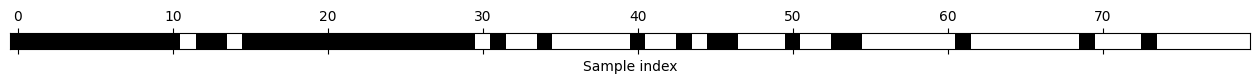

In [13]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
select=SelectFromModel(RandomForestClassifier(n_estimators=100,random_state=42),threshold="median")

select.fit(X_train,y_train)
X_train_model=select.transform(X_train)
mask=select.get_support()
plt.matshow(mask.reshape(1,-1),cmap='gray_r')
plt.xlabel("Sample index")
plt.yticks(())

In [14]:
X_test_model=select.transform(X_test)
lr=LogisticRegression(max_iter=100000).fit(X_train_model,y_train)
print("Score wwith select features: {:.3f}".format(lr.score(X_test_model,y_test)))

Score wwith select features: 0.947


In [22]:
citibike=mglearn.datasets.load_citibike()
xticks=pd.date_range(start=citibike.index.min(),end=citibike.index.max(),freq='D')
y=citibike.values
X=citibike.index.astype("int64").values.reshape(-1,1)
n_train=184

In [28]:
def eval_on_features(features,target,regressor):
    X_train,X_test=features[:n_train],features[n_train:]
    y_train,y_test=target[:n_train],target[n_train:]

    regressor.fit(X_train,y_train)
    print("Test=set R^2:{:.2f}".format(regressor.score(X_test,y_test)))
    y_pred=regressor.predict(X_test)

    plt.figure(figsize=(10,3))
    plt.xticks(range(0,len(X),8),xticks.strftime("%a %m-%d"),rotation=90,ha="left")

    plt.plot(range(n_train),y_train,label="train")
    plt.plot(range(n_train,len(y_test)+n_train),y_test,'-',label="test")
    plt.plot(range(n_train,len(y_test)+n_train),y_pred,'--',label="prediction test")
    plt.legend(loc=(1.01,0))
    plt.xlabel("Date")
    plt.ylabel("Rentals")

Test=set R^2:-0.04


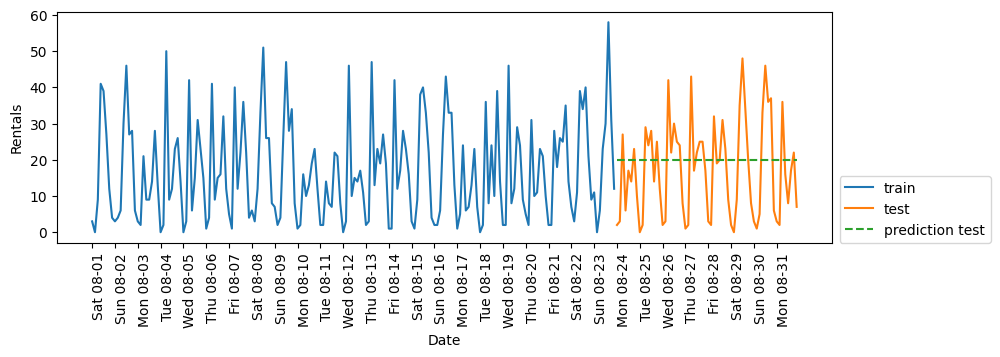

In [29]:
from sklearn.ensemble import RandomForestRegressor

regressor=RandomForestRegressor(n_estimators=100,random_state=0)
eval_on_features(X,y,regressor)

Test=set R^2:0.60


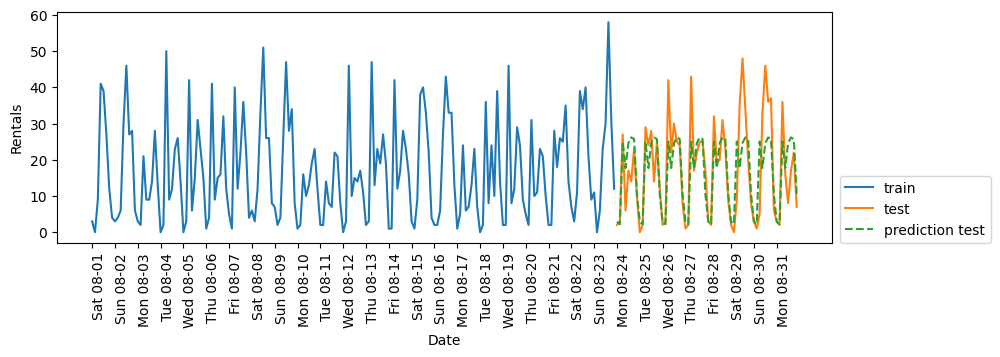

In [34]:
X_hour=citibike.index.hour.values.reshape(-1,1)
eval_on_features(X_hour,y,regressor)

Test=set R^2:0.84


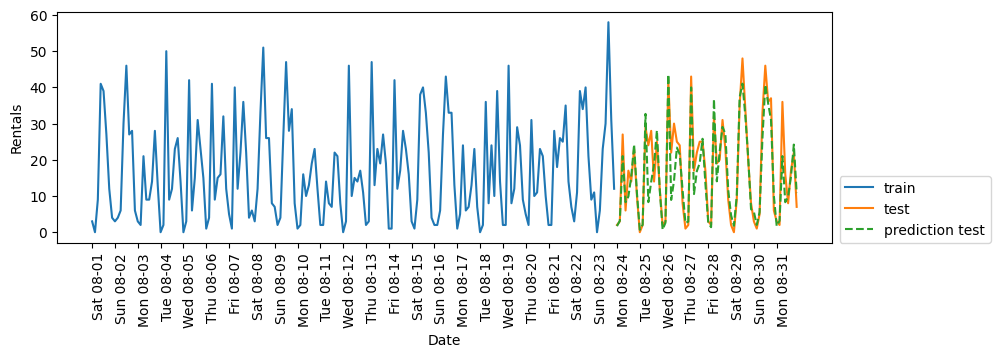

In [37]:
X_hour_week=np.hstack([citibike.index.dayofweek.values.reshape(-1,1),citibike.index.hour.values.reshape(-1,1)])
eval_on_features(X_hour_week,y,regressor)

Test=set R^2:0.13


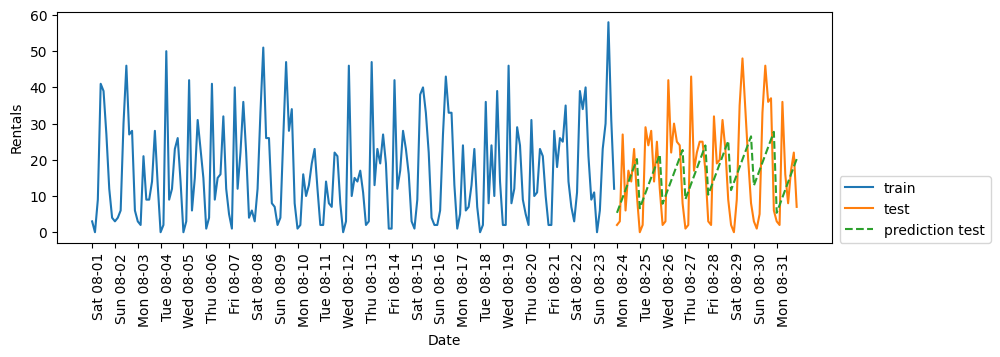

In [38]:
eval_on_features(X_hour_week,y,LinearRegression())

Test=set R^2:0.62


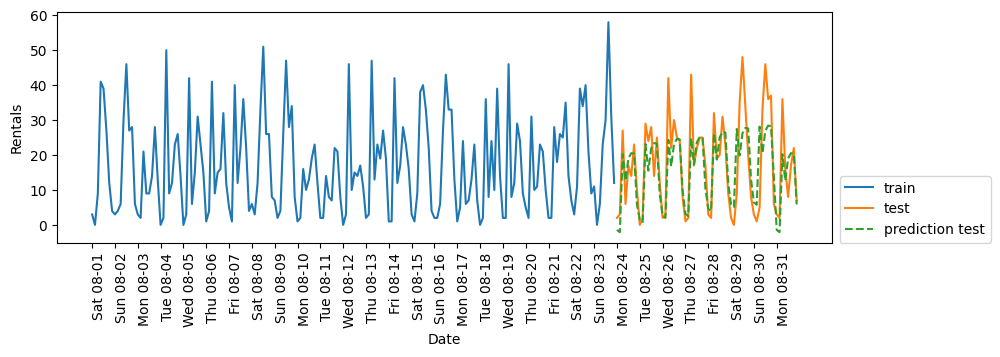

In [42]:
from sklearn.preprocessing import OneHotEncoder
enc=OneHotEncoder()
X_hour_week_onehot=enc.fit_transform(X_hour_week).toarray()

eval_on_features(X_hour_week_onehot,y,Ridge())

Test=set R^2:0.85


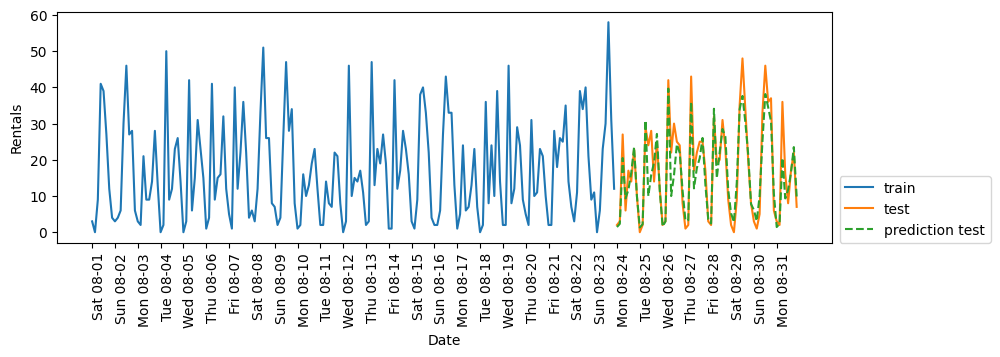

In [43]:
poly_transformer=PolynomialFeatures(degree=2,interaction_only=True,include_bias=False)
X_hour_week_poly=poly_transformer.fit_transform(X_hour_week_onehot)
eval_on_features(X_hour_week_poly,y,Ridge())